In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler




In [4]:
# TODO:
# 1. Loading and scaling the wine dataset
# 2. Performing PCA via SVD
# 3. Creating a 3D scatter plot
# 4. Generating scree plots
# 5. Computing and plotting explained variance
# 6. Plotting total explained variance vs. number of components

2.6538461538461537


In [7]:
def load_data():
    # Load and scale the wine dataset
    
    # Load wine data from sklearn.datasets
    wine = load_wine()
    data = wine.data
    target = wine.target

    # Standardize the features using StandardScaler
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(data)
    return scaled_data, target, wine.feature_names
    
    pass

In [14]:
def perform_pca(data):
    # Perform PCA using SVD and other necessary computations
    
    # Perform Singular Value Decomposition (SVD)
    U, s, VT = np.linalg.svd(data.T)
    
    # Return the left singular vectors (U), singular values (s), and right singular vectors (VT)
    return U, s, VT
    
    pass


In [23]:
def plot_3d_pca(U, data, target):
    # Create a 3D scatter plot of the first three principal components
    
    k = 3  # number of components to keep
    Uk = U[:, :k]
    x_pca = np.dot(data, Uk)

    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(projection='3d')
    ax.scatter(x_pca[:, 0], x_pca[:, 1], x_pca[:, 2], c=target, cmap='plasma')
    #scatter = plt.scatter(x_pca[:, 0], x_pca[:, 1], c=target, cmap='plasma')
    plt.xlabel('First Principal Component')
    plt.ylabel('Second Principal Component')
    plt.zlabel('Third Principal Component')
    plt.colorbar(ax.scatter)
    plt.title('PCA of Wine Dataset')
    plt.show()
    
    pass


In [25]:
def create_scree_plot(data):
    # Create a scree plot of the singular values
    
    plt.figure(figsize=(8, 6))
    plt.plot(data)  #plots eigenvalues of order from 1st to 12th
    plt.show()
    
    pass

In [48]:
def plot_explained_variance(s):
    # Compute and plot the variance explained by each principal component    
    explained_var = []
    sumx = 0
    #explained_var = np.cumsum(s)/np.sum(s)
    for i in range(len(s)):
        sumx=sumx+s[i]
    for i in range(len(s)):
        explained_var.append(s[i]/sumx)
    print(explained_var)
    
    plt.figure(figsize=(8, 6))
    plt.plot(explained_var)
    plt.show()
    
    pass

In [50]:
def plot_cumulative_variance():
    # Plot the cumulative variance explained
    
    cumulative_var = np.cumsum(s)/np.sum(s)
    
    plt.figure(figsize=(8, 6))
    plt.plot(s, cumulative_var)
    plt.show()
    
    pass

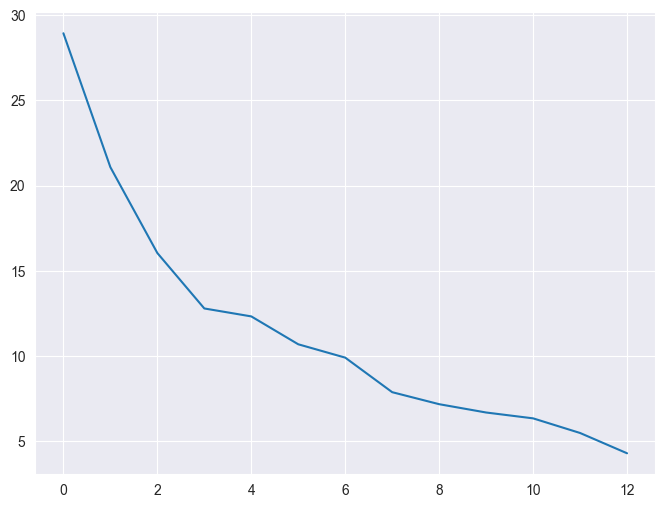

[np.float64(0.1934468965691125), np.float64(0.14091255910064632), np.float64(0.10723527483800664), np.float64(0.08548586477307094), np.float64(0.08237118430039626), np.float64(0.07143222766372945), np.float64(0.0661956836816959), np.float64(0.05264322216290888), np.float64(0.04792933570939922), np.float64(0.04466786492405019), np.float64(0.042373443516618876), np.float64(0.0366345315519489), np.float64(0.028671911208415928)]


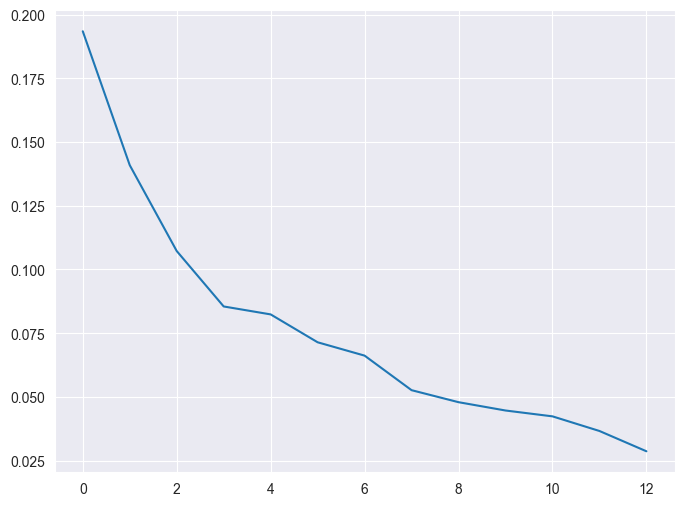

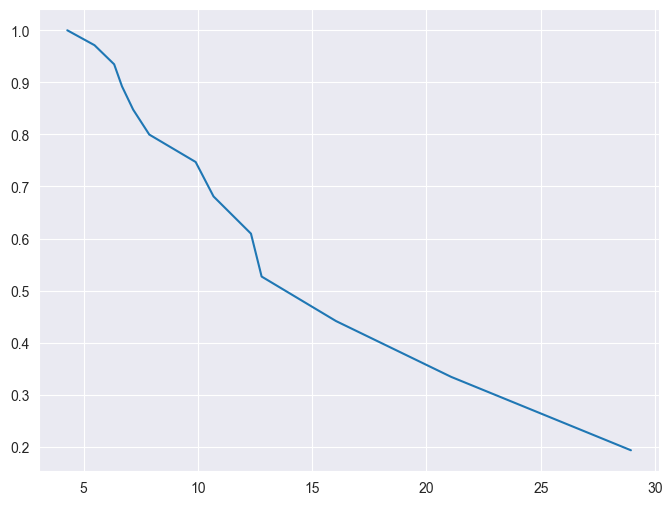

In [51]:

if __name__ == "__main__":
    # Call functions here
    
    #load and scale date
    wine_scaled, wine_target, wine_feature_names = load_data()
    
    #preform PCA and SVD
    U, s, VT = perform_pca(wine_scaled)
    
    #plot first 3 PCAs
    #plot_3d_pca(U, wine_scaled, wine_target)
    
    #scree plot
    create_scree_plot(s)
    
    #variance plot
    plot_explained_variance(s)
    
    #cumulative variance plot
    plot_cumulative_variance()
    
    pass